In [ ]:
import pandas as pd
import numpy as np

In [80]:
from google.colab import drive
drive.mount('/content/drive')
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'
test_file_path = '/content/drive/MyDrive/LGdata/submission.csv'
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
both_null_count = df_train[df_train['ver_win_ratio_per_bu'].isnull() & df_train['business_area'].isnull()].shape[0]
print("ver_win_ratio_per_bu, business_area 모두 결측치인 데이터의 갯수:", both_null_count)

ver_win_ratio_per_bu, business_area 모두 결측치인 데이터의 갯수: 40882


In [82]:
both_null_count = df_train[df_train['ver_win_ratio_per_bu'].isnull() & df_train['business_unit'].isnull()].shape[0]
print("ver_win_ratio_per_bu, business_unit 모두 결측치인 데이터의 갯수:", both_null_count)

ver_win_ratio_per_bu, business_unit 모두 결측치인 데이터의 갯수: 0


In [83]:
it_non_null_count = df_train[(df_train['business_unit'] == 'IT') & (~df_train['ver_win_ratio_per_bu'].isnull())].shape[0]
print("IT business_unit에서 ver_win_ratio_per_bu가 결측치가 아닌 데이터의 갯수:", it_non_null_count)

IT business_unit에서 ver_win_ratio_per_bu가 결측치가 아닌 데이터의 갯수: 0


In [84]:
it_non_null_count = df_train[(df_train['business_unit'] == 'IT') & df_train['business_area'].isnull()].shape[0]
print("IT business_unit에서 business_area가 결측치인 데이터의 갯수:", it_non_null_count)

IT business_unit에서 business_area가 결측치인 데이터의 갯수: 5972


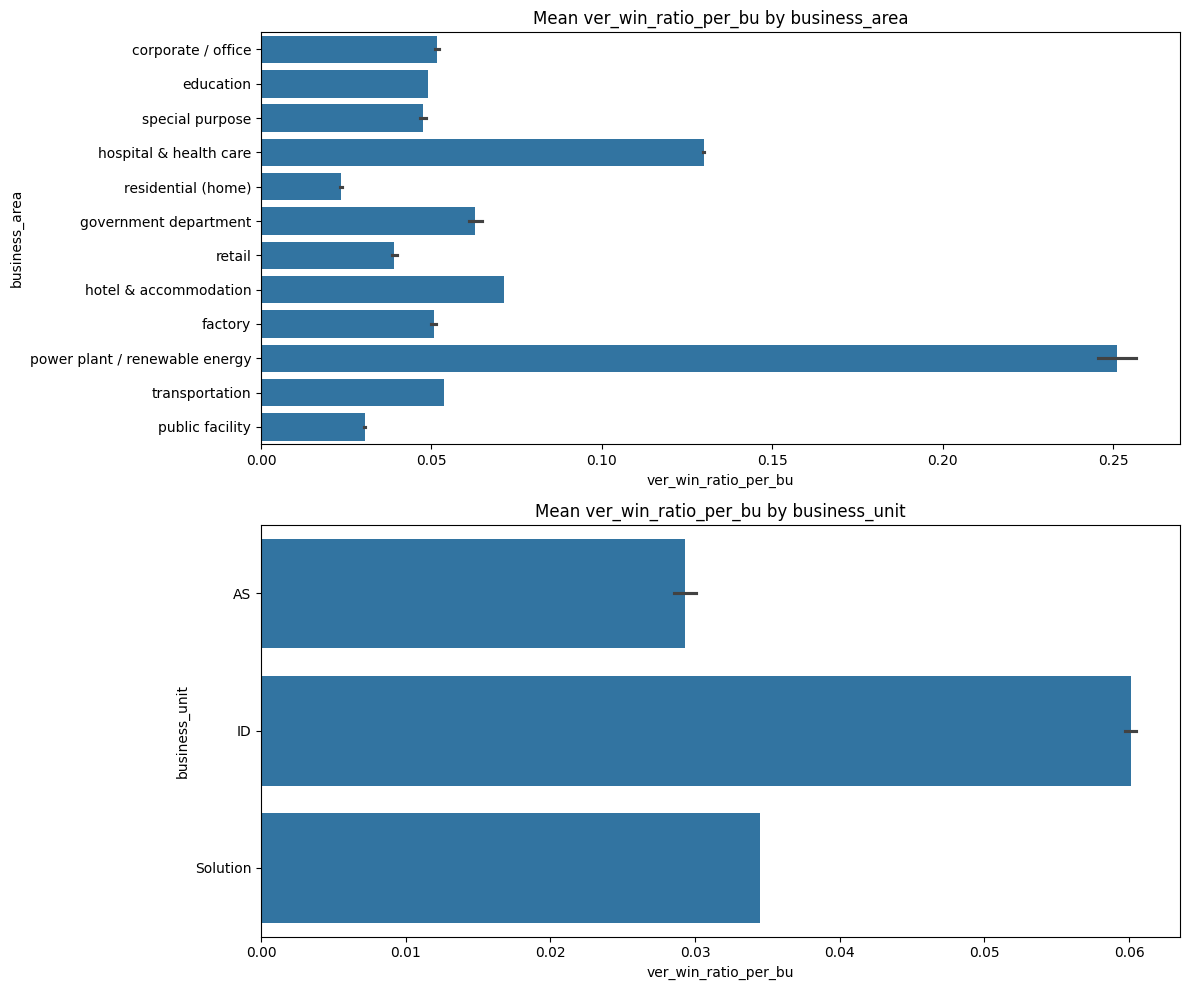

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치가 없는 데이터 선택
non_null_data = df_train.dropna(subset=['ver_win_ratio_per_bu'])

# business_area에 따른 ver_win_ratio_per_bu의 평균 계산
mean_by_area = non_null_data.groupby('business_area')['ver_win_ratio_per_bu'].mean().reset_index()

# business_unit에 따른 ver_win_ratio_per_bu의 평균 계산
mean_by_unit = non_null_data.groupby('business_unit')['ver_win_ratio_per_bu'].mean().reset_index()

# Subplots 생성
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# business_area에 따른 막대 그래프
sns.barplot(x='ver_win_ratio_per_bu', y='business_area', data=non_null_data, ax=axes[0])
axes[0].set_title('Mean ver_win_ratio_per_bu by business_area')

# business_unit에 따른 막대 그래프
sns.barplot(x='ver_win_ratio_per_bu', y='business_unit', data=non_null_data, ax=axes[1])
axes[1].set_title('Mean ver_win_ratio_per_bu by business_unit')

plt.tight_layout()
plt.show()


In [86]:
# 결측치를 채우는 함수 정의
def fill_ver_win_ratio_per_bu(row):
    if pd.isnull(row['ver_win_ratio_per_bu']):
        # 결측치인 경우 해당 business_unit의 평균값으로 채우기
        business_unit = row['business_unit']
        if not pd.isnull(business_unit):
            mean_value = mean_by_unit[mean_by_unit['business_unit'] == business_unit]['ver_win_ratio_per_bu'].values
            if len(mean_value) > 0:
                return mean_value[0]
    return row['ver_win_ratio_per_bu']

# 결측치 처리 함수를 적용하여 ver_win_ratio_per_bu 열의 결측치 채우기
df_train['ver_win_ratio_per_bu'] = df_train.apply(fill_ver_win_ratio_per_bu, axis=1)

print("ver_win_ratio_per_bu 열의 결측치 갯수:")
print(len(df_train[df_train['ver_win_ratio_per_bu'].isnull()]))

# 남아있는 결측치에 대해 business_area의 평균값으로 채우기
remaining_nulls = df_train[df_train['ver_win_ratio_per_bu'].isnull()]
for index, row in remaining_nulls.iterrows():
    business_area = row['business_area']
    if not pd.isnull(business_area):
        mean_value = mean_by_area[mean_by_area['business_area'] == business_area]['ver_win_ratio_per_bu'].values
        if len(mean_value) > 0:
            df_train.at[index, 'ver_win_ratio_per_bu'] = mean_value[0]

print("ver_win_ratio_per_bu 열의 결측치 갯수:")
print(len(df_train[df_train['ver_win_ratio_per_bu'].isnull()]))


ver_win_ratio_per_bu 열의 결측치 갯수:
8666
ver_win_ratio_per_bu 열의 결측치 갯수:
5974


In [87]:
# 전체 평균값 계산
global_mean_ver_win_ratio_per_bu = df_train['ver_win_ratio_per_bu'].mean()

# 나머지 결측치를 전체 평균값으로 채우기
df_train['ver_win_ratio_per_bu'].fillna(global_mean_ver_win_ratio_per_bu, inplace=True)

# 결과 확인
print("ver_win_ratio_per_bu 결측치 갯수:")
print(df_train[df_train['ver_win_ratio_per_bu'].isnull()])


ver_win_ratio_per_bu 결측치 갯수:
Empty DataFrame
Columns: [bant_submit, customer_country, business_unit, com_reg_ver_win_rate, customer_idx, customer_type, enterprise, historical_existing_cnt, id_strategic_ver, it_strategic_ver, idit_strategic_ver, customer_job, lead_desc_length, inquiry_type, product_category, product_subcategory, product_modelname, customer_country.1, customer_position, response_corporate, expected_timeline, ver_cus, ver_pro, ver_win_rate_x, ver_win_ratio_per_bu, business_area, business_subarea, lead_owner, is_converted]
Index: []

[0 rows x 29 columns]
